In [1]:
cd /Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_1

/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_1


# Notes
- .005 converges very slightly lower than .001. Very clear clustering of responses in both cases.
- Issue: hyperplanes do not cluster as clearly in .001 nets. Fan out. Trajectories cross through center of two fans.
- Going to add delay period so that that inputs are off at some point.

In [4]:

from TwoAFCTask import generate_trials

#from Experiment_5.SiegelMillerTask import generate_trials
import networkx as nx
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from net import *
import os
import statsmodels.api as sm
import scipy.optimize as opt
from scipy.stats import special_ortho_group
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import math
#from psychometrics import *
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import networkx as nx
from sklearn.cluster import KMeans

plt.rcParams["axes.grid"] = False
from sklearn.manifold import TSNE

matplotlib.rcParams['axes.linewidth'] = .5


def compute_var(variance, n):
    return np.sum(variance[n:])


def compute_p(k, null_k):
    return np.sum(null_k < k) / len(null_k)


df_list = []
for filename in os.listdir('Results_1'):
    f = os.path.join('Results_1', filename)
    if os.path.isfile(f):
        df_list.append(pd.read_pickle(f))
original_df = pd.concat(df_list,ignore_index=True) 
original_df = original_df[original_df.mse_z<.035]
original_df = original_df[original_df.lambda_std==0.4]
#original_df = original_df[original_df.activity_std<.01]
original_df = original_df[original_df.lr==0.005]
#original_df = original_df[original_df.n==100]
original_df = original_df[original_df.sigma_rec==0.]
df = original_df.copy()

# Restrict to networks with dim and compute variance above dim
dim = 2
df = df[df.dim == dim]
df = df[df.k >= dim]
df['var'] = df.variance.apply(lambda x: compute_var(x, dim))
df['k_inertia'] = df.inertia.apply(lambda x: x[dim - 1])
df['var'] = np.log(df['var'])
df.sort_values('var', ascending=True)




,model_id,w_rec,w_in,w_out,bias,mse_z,weight_decay,threshold,sigma_rec,lambda_std,...,lvar,dim,k,p_value,inertia,activity_std,null_inertia,variance,var,k_inertia
2994,T1n5smOa,"[[0.0, 0.001234026, -0.052101653, -0.003586580...","[[-0.034337297, -0.0007821807], [0.13146386, -...","[[0.25213653, 0.00953815, 0.1282984, 0.0135795...","[0.07767935, 0.0018679115, 0.1391639, 0.007772...",0.028899,0.001,0.025,0.0,0.4,...,0.177828,2,3,0.0,"[0.49780177486097416, 0.25072837571540313, 0.0...",0.00712535,"[[0.9964515211578868, 0.9976211288966678, 0.99...","[0.7276882, 0.24980804, 0.019724878, 0.0016501...",-3.794071,0.250728
2848,Tuy6rZYh,"[[0.0, -0.032331243, -0.017521225, 0.008727062...","[[-0.09562893, -0.016768523], [-0.04756456, 0....","[[0.04231965, 0.13507468, 0.013384173, 0.38216...","[0.028736362, 0.049567465, 0.0481075, 0.090373...",0.029747,0.001,0.025,0.0,0.4,...,0.056234,2,3,0.0,"[0.8705346657633243, 0.04709559550022584, 0.02...",0.015508405,"[[0.997828772650679, 0.9945356991383196, 0.993...","[0.84929883, 0.12014451, 0.024552297, 0.002724...",-3.488170,0.047096
2920,C4mbpDT8,"[[0.0, -0.00040833585, 0.004261597, 0.00791602...","[[-0.058637626, 0.13905656], [-0.0022663926, -...","[[0.0804867, 0.36675337, 0.064158, 0.08297191,...","[0.01053837, 0.10826324, 0.0103564495, 0.01210...",0.034501,0.001,0.025,0.0,0.4,...,0.133352,2,4,0.0,"[0.6809310431380368, 0.3416291788866374, 0.026...",0.004513012,"[[0.9960693838554028, 0.9845453618951171, 0.99...","[0.6524794, 0.3049275, 0.028734284, 0.01179000...",-3.156060,0.341629
3076,KZ9pnU7s,"[[0.0, -0.05028169, 0.009165385, -0.024140593,...","[[-0.080596596, 0.14070301], [-0.0142329745, -...","[[-0.01842947, 0.1043555, 0.018674418, 0.41642...","[0.053726416, 0.119029045, -0.001912556, 0.129...",0.029698,0.001,0.025,0.0,0.4,...,0.237137,2,3,0.0,"[0.9105187074829932, 0.3456346450617284, 0.007...",0.012251571,"[[0.9971984856251227, 0.9988233871296893, 0.99...","[0.5657888, 0.39134178, 0.036535323, 0.0041310...",-3.149596,0.345635
2692,hzwR9KdS,"[[0.0, 0.00995647, -0.0032365462, 0.00432121, ...","[[-0.074854024, 0.1347311], [-0.073266156, 0.1...","[[0.10229318, 0.118357256, 0.0022106222, 0.091...","[0.029307462, 0.034801275, 0.05856074, 0.02479...",0.031465,0.001,0.025,0.0,0.4,...,0.100000,2,4,0.0,"[0.7493669174871206, 0.28154777920156027, 0.03...",0.0053239833,"[[0.9938427046233322, 0.9992969513446616, 0.99...","[0.49559522, 0.45901406, 0.030336363, 0.012203...",-3.092447,0.281548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,tItBQK9S,"[[0.0, 0.026515983, 0.023802496, 0.023240117, ...","[[0.19016376, -0.1798076], [-0.13050973, -0.07...","[[0.03882334, 0.16731323, 0.18188961, 0.007890...","[-0.018064337, 0.07217583, 0.032588407, -0.098...",0.025155,0.001,0.025,0.0,0.4,...,-0.316228,2,5,0.0,"[0.9547265928515929, 0.8838545713545714, 0.823...",0.004419782,"[[0.9898209530474934, 0.9917151080444496, 0.99...","[0.10127259, 0.091502905, 0.08457155, 0.079715...",-0.214154,0.883855
1217,PfxHZ3b8,"[[0.0, -0.026715633, -0.064394005, -0.05155197...","[[-0.0021947967, 0.07838191], [0.2307304, -0.1...","[[0.109013245, 0.007822613, 0.036684904, 0.159...","[0.02559871, -0.10528411, -0.017910428, -0.009...",0.027221,0.001,0.025,0.0,0.4,...,-0.316228,2,5,0.0,"[0.9530683609141056, 0.8772226326503809, 0.816...",0.0049062637,"[[0.9936518067051779, 0.9832037988128202, 0.99...","[0.10000063, 0.09271162, 0.0905606, 0.08522631...",-0.214075,0.877223
969,tgarhcqH,"[[0.0, -0.073897615, -0.02196925, -0.019803721...","[[-0.06737507, 0.037100885], [-0.014068496, -0...","[[-0.043951936, 0.4315435, 0.009624542, 0.0160...","[0.11029392, 0.081862554, -0.104151234, -0.088...",0.031459,0.001,0.025,0.0,0.4,...,-0.421697,2,5,0.0,"[0.9571930818229577, 0.8904600078802206, 0.829...",0.006129445,"[[0.9939626590312202, 0.9899057416697103, 0.98...","[0.10430225, 0.08785335, 0.08599953, 0.0806907...",-0.213386,0.890460
739,q7L0XnXh,"[[0.0, -0.08240289, 0.06682777, -0.041067682, ...","[[-0.0275

In [18]:
ids = ['UmC2Q5Zc','ornJQo8e','7lFueKjB','GK1kF5tL','zEPULV9I','gQrhbfAY','yWodmPeS']

In [37]:
ids = ['3mDPfi0E','SJqVuTme','h9ZblZur','dDkH9M7A','HxFEhbUF','HzQhdwTZ','ZbsuN3wh']

In [5]:
## RESPONSE MATRIX
model_data = df[df.model_id=='T1n5smOa']
net = Net(n=150,input_size = 2,dale=False)
net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
variance = model_data['var'].item()
u, z, mask, conditions  = generate_trials(
                            n_trials=25)
x = net(u).detach().cpu().numpy()

rows = []
for k in range(u.shape[0]):
    rows.append({'trial': k,
                 'motion': conditions[k]['motion_coh'],
                 'response': x[k, :, :]})
df = pd.DataFrame(rows)
df = df.groupby(['motion']).response.apply(lambda r: np.mean(np.stack(r), axis=0)).reset_index()

#df = df.groupby('motion').response.apply(lambda r: np.mean(np.stack(r), axis=0)).reset_index()
responses = np.stack(df.response.values)
responses = responses.reshape(-1, responses.shape[2]).T

responses = responses[np.mean(responses, axis=1) >.025, :]

# z_score
responses = (responses - np.mean(responses, axis=1, keepdims=True)) / np.std(responses, axis=1, keepdims=True)
responses = responses[~np.isnan(responses).any(axis=1)]




In [384]:
model_data = df[df.model_id=='9MZUWhnw']
net = Net(n=100,input_size = 2,dale=False)
net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())


# calculate scale with no noise
net.sigma_rec = 0.
x = net.forward(u)
pca = PCA()
pca.fit(x.detach().cpu().numpy().reshape(-1, x.shape[2]))
pcs = torch.tensor(pca.components_[:dim, :]).float().to(device)
x_proj = pca.transform(x.detach().cpu().numpy().reshape(-1, x.shape[2]))
scale = torch.tensor(np.max(x_proj)).float()

r1=np.sum(pca.explained_variance_[2:])

# Resimulate with noise on appropriate scale
net.sigma_rec = 10
# recurrent_noise = net.sigma_rec * scale * torch.empty(u.shape[0], u.shape[1], dim).normal_(mean=0,
#                                                                                                 std=1).to(
#     device=device) @ pcs

recurrent_noise = torch.tile(torch.empty(u.shape[0], 1,dim).normal_(mean=0,std=1).to(
    device=device),(1,u.shape[1],1)) @ pcs

x = net(u,recurrent_noise = net.sigma_rec * recurrent_noise)
pca = PCA().fit(x.detach().cpu().numpy().reshape(-1, x.shape[2]))
x_proj = pca.transform(x.detach().cpu().numpy().reshape(-1, x.shape[2]))

r2=np.sum(pca.explained_variance_[2:])

AttributeError: 'DataFrame' object has no attribute 'model_id'

In [362]:
r1,r2

(0.0008152888, 0.18689902)

In [335]:
r0

0.44015193

In [375]:
# EFFECT OF NOISE ON DIMENSIONALITY
df = df[df['var']<-3]
dim = 2
u, z, mask, conditions  = generate_trials(
                            n_trials=25)
rows = []
for _, row in df.iterrows():

    net = Net(n=100,input_size = 2,dale=False)
    net.recurrent_layer.weight.data = torch.tensor(row['w_rec'])
    net.recurrent_layer.bias.data = torch.tensor(row['bias'])
    net.input_layer.weight.data = torch.tensor(row['w_in'])
    net.output_layer.weight.data = torch.tensor(row['w_out'])
    variance = model_data['var'].item()
    u, z, mask, conditions  = generate_trials(
                            n_trials=25)
    
    x = net.forward(u)
    pca = PCA()
    pca.fit(x.detach().numpy().reshape(-1,x.shape[2]))
    
    U = pca.components_[:2,:].T
    #U = latent_net.module_.q[:2,:].t().detach()
    w = net.recurrent_layer.weight.data
    #w = w-np.eye(50)
    w_in = net.input_layer.weight.data
    
    b = net.recurrent_layer.bias.data
    #b = net.input_layer(u[1,60,:]).detach()+0.2
    
    H = w @ U 
    # # calculate scale with no noise
    # net.sigma_rec = 0.
    # x = net.forward(u)
    # pca = PCA()
    # pca.fit(x.detach().cpu().numpy().reshape(-1, x.shape[2]))
    # pcs = torch.tensor(pca.components_[:dim, :]).float().to(device)
    # x_proj = pca.transform(x.detach().cpu().numpy().reshape(-1, x.shape[2]))
    # scale = torch.tensor(np.max(x_proj)).float()
    # r1=np.sum(pca.explained_variance_ratio_[2:])
    # 
    # # Resimulate with noise on appropriate scale
    # net.sigma_rec = .1
    # # recurrent_noise = net.sigma_rec * scale * torch.empty(u.shape[0], u.shape[1], dim).normal_(mean=0,
    # #                                                                                                 std=1).to(
    # #     device=device) @ pcs
    # 
    # recurrent_noise = torch.tile(torch.empty(u.shape[0], 1,dim).normal_(mean=0,std=1).to(
    #     device=device),(1,u.shape[1],1)) @ pcs
    # 
    # x = net(u,recurrent_noise = recurrent_noise)
    # pca = PCA().fit(x.detach().cpu().numpy().reshape(-1, x.shape[2]))
    # #x_proj = pca.transform(x.detach().cpu().numpy().reshape(-1, x.shape[2]))
    # 
    # r2=np.sum(pca.explained_variance_ratio_[2:])
    rows.append({'model_id':row['model_id'],
                'std':torch.std(torch.linalg.norm(H,dim=1)).item(),
                            'lr':row['lr']
                            })

<Axes: xlabel='std', ylabel='Probability'>

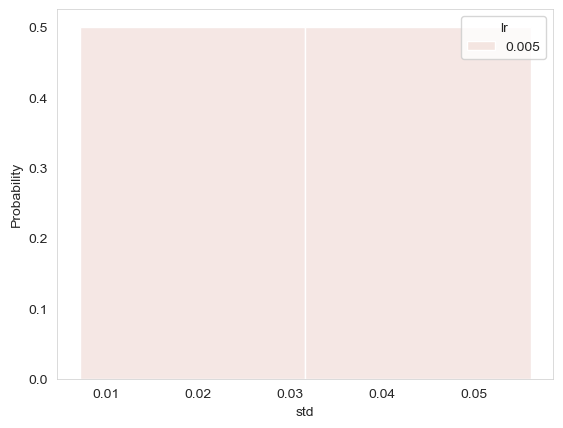

In [376]:
new_df = pd.DataFrame(rows)
plt.figure()
sns.histplot(data = new_df, x = 'std',hue = 'lr',stat = 'probability')

In [374]:
new_df

,model_id,std,lr
0,9MZUWhnw,0.007194,0.005
1,sjYrs7zE,0.055707,0.005


In [288]:
new_df.shape

(610, 6)

<Axes: >

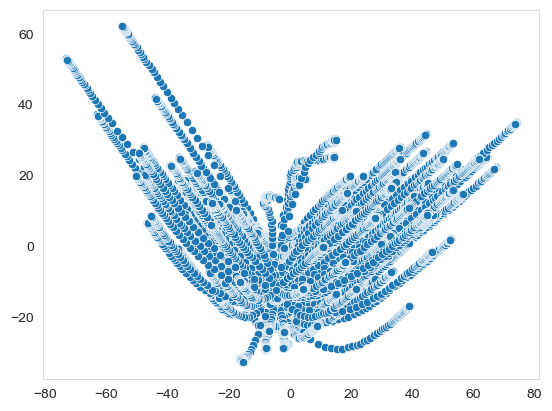

In [351]:
plt.figure()
sns.scatterplot(x = x_proj[:,0],y = x_proj[:,1])

In [251]:
scale

tensor(2.2261)

In [245]:
model_data = df[df.model_id=='Z8SmRACW']

In [57]:
np.sum(pca.explained_variance_ratio_[2:])

0.018799294

<Axes: ylabel='Count'>

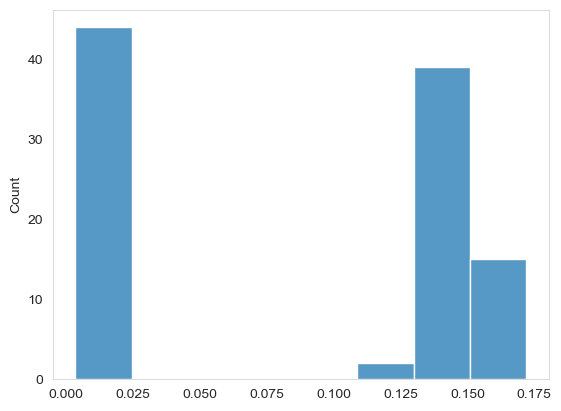

In [222]:

plt.figure()
sns.histplot(np.mean(x,axis=(0,1)))

0.006760292486496913


FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_1/Figures/Fig_2afc_b.jpg'

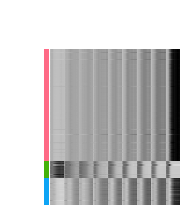

In [6]:
## CLUSTERED RESPONSE MATRIX        
#_,k = compute_k(responses,5,25,.05)
k = model_data.k.values[0]
import matplotlib
clustering = KMeans(n_clusters=k, n_init=20).fit(responses)
total_variance = np.sum((responses.T - np.mean(responses.T, axis=0, keepdims=True)) ** 2)
print(clustering.inertia_/total_variance)
labels = clustering.labels_
sort = np.argsort(labels)
sorted_responses = responses[sort, :]
sns.husl_palette(s=.4)
network_pal = sns.husl_palette(pd.Series(np.sort(labels)).unique().size, s=1)
lut = dict(zip(pd.Series(np.sort(labels)).unique(), network_pal))
row_colors = pd.Series(np.sort(labels)).map(lut)
g = sns.clustermap(pd.DataFrame((sorted_responses)), row_cluster=False, col_cluster=False, row_colors=row_colors,
                   figsize=(2, 2.25), cbar_pos=None, xticklabels=False, yticklabels=False, center=0,cmap='Greys')
ax = g.ax_heatmap

g.savefig('Figures/Fig_2afc_b.jpg',
          format='jpeg',
          dpi=450,
          bbox_inches='tight'
          )

In [29]:
responses.shape

(100, 3750)

In [225]:
## Heat map of magnitude of vector field outside of PCS.
# For each (x,y) on a grid centered on the mean of trajectories, compute magnitude of
# of projection onto PCs above 2.

# Generate trajectories
# x = net(u)
# f = -x + torch.relu(net.recurrent_layer(x))
# mean = torch.mean(torch.linalg.norm(f,dim=2))
# x = net(u).detach().cpu().numpy()
# rows = []
# for trial in range(u.shape[0]):
#     rows.append({'trial': trial,
#                  'motion': conditions[trial]['motion_coh'],
#                  'response': x[trial, :, :]})
# model_df = pd.DataFrame(rows)
# model_df = model_df.groupby(['motion']).response.apply(lambda r: np.mean(np.stack(r), axis=0)).reset_index()
# responses = np.stack(model_df.response.values)
# responses = responses.reshape(-1, responses.shape[2]).T

# COmpute PCA for responses
pca_2 = PCA(n_components=2).fit(responses.T)
pcs_2 = torch.tensor(pca_2.components_).float()
pca_full = PCA().fit(responses.T)
x_proj = pca_2.transform(responses.T)
lim = 2*np.max(x_proj)
pcs = torch.tensor(pca_full.components_).float()
n_steps = 50
matrix = np.zeros((n_steps,n_steps))
for i in range(n_steps):
    for j in range(n_steps):
        x = np.linspace(-lim,lim,n_steps)[i]
        y = np.linspace(-lim,lim,n_steps)[j]
        # Inverse transform (x,y) into state space
        z = torch.tensor(pca_2.inverse_transform(np.array([[x,y]]))).float()

        # Compute vector field at z
        f = -z + torch.nn.ReLU()(net.recurrent_layer(z))
        #v_1 = (f @ pcs[2:,:].t() @ pcs[2:,:]).detach().cpu().numpy()
        v_1 = f.detach().cpu().numpy()
        v_2 = (f @ pcs[:2,:].t() @ pcs[:2,:]).detach().cpu().numpy()
        cos_theta = np.dot(v_1, v_2.T) / (np.linalg.norm(v_1) * np.linalg.norm(v_2))

        # Ensure the value is within the valid range for arccos
        cos_theta = np.clip(cos_theta, -1.0, 1.0)

        angle_rad = np.arccos(cos_theta)
        angle_deg = np.degrees(angle_rad)
        # Project vector onto last PCs and calculate magnitude
        mag = torch.linalg.norm( f @ pcs[2:,:].t() @ pcs[2:,:])
        matrix[i,j] = mag
        
        
        
        

In [161]:
pca_2.explained_variance_

array([89.67683 , 10.370137], dtype=float32)

<Axes: >

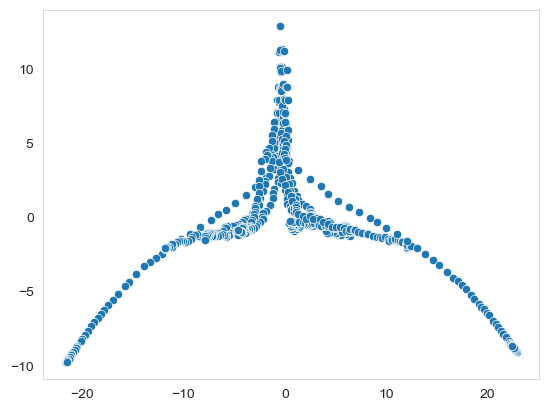

In [175]:
plt.figure()
sns.scatterplot(x = x_proj[:,0],y = x_proj[:,1])

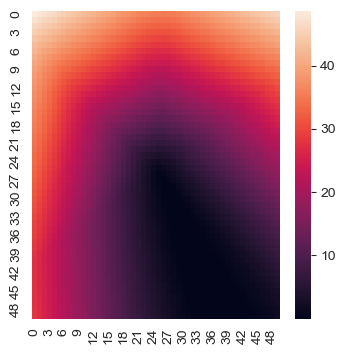

In [227]:
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])
sns.heatmap(matrix.T,ax=ax)
plt.savefig('/Users/cl1704/PycharmProjects/clustering_in_rnns/Figures/Fig1c.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight'
            )

<Axes: ylabel='Count'>

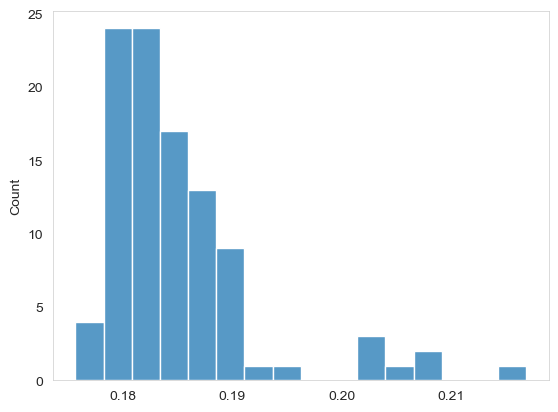

In [11]:
x = net.forward(u)
n_neurons = x.shape[2]
#Restrict to act

pca = PCA()
pca.fit(x.detach().numpy().reshape(-1,x.shape[2]))

U = pca.components_[:2,:].T
#U = latent_net.module_.q[:2,:].t().detach()
w = net.recurrent_layer.weight.data
#w = w-np.eye(50)
w_in = net.input_layer.weight.data

b = net.recurrent_layer.bias.data
#b = net.input_layer(u[1,60,:]).detach()+0.2

H = w @ U 
plt.figure()
sns.histplot(x = np.linalg.norm(H,axis=1))

In [65]:
np.std(np.linalg.norm(H,axis=1))

0.012897218

<Axes: >

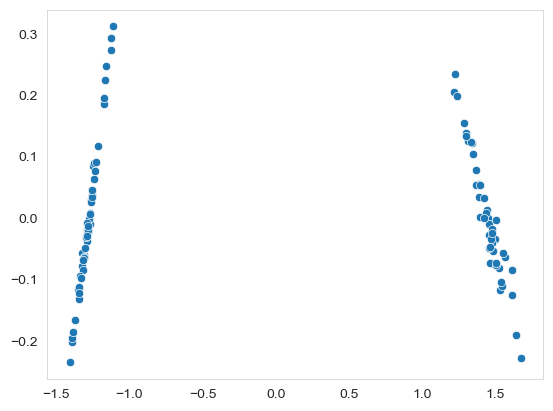

In [84]:
plt.figure()
pca = PCA().fit(responses)
x_proj = pca.transform(responses)
sns.scatterplot(x = x_proj[:,0],y=x_proj[:,1])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_1/Figures/Fig1c.jpg'

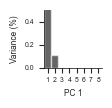

In [116]:
## PCA
fig = plt.figure(figsize=(.75,.75))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])
pca = PCA().fit(responses.T)
sns.barplot(x = np.arange(1,9),y=pca.explained_variance_ratio_[:8],alpha=.6,ax=ax,color='k',width=1)
ax.set_xlabel("PC 1", fontsize=6)
ax.set_ylabel("Variance (%)", fontsize=6)
#ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
ax.xaxis.set_tick_params(labelsize=5, bottom=True)
ax.yaxis.set_tick_params(labelsize=5, left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,.5)
plt.savefig('Figures/Fig1c.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight'
            )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_1/Figures/Fig_2afc_c.jpg'

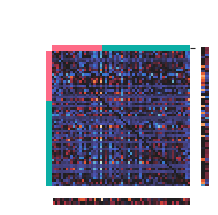

In [390]:

## RECURRENT MATRIX

sort = np.argsort(labels)
w = net.recurrent_layer.weight.data
w_in = net.input_layer.weight.data
w_out = net.output_layer.weight.data

w = w[sort, :]
w = w[:, sort]
w_in = w_in[sort, :]
w_out = w_out[:, sort]

g = sns.clustermap(pd.DataFrame(w), center=0, row_cluster=False, col_cluster=False, row_colors=row_colors,
                   col_colors=row_colors, figsize=(2.25, 2.25), cbar_pos=None, xticklabels=False, yticklabels=False)

g.gs.update(left=0.05, right=0.85, bottom=.15)
gs2 = matplotlib.gridspec.GridSpec(1, 1, left=.9, top=.77, bottom=.15)
ax2 = g.fig.add_subplot(gs2[0])
sns.heatmap(w_in, ax=ax2, cbar=False, xticklabels=False, yticklabels=False, center=0)

gs3 = matplotlib.gridspec.GridSpec(1, 1, left=.24, top=.1, right=.85)
ax3 = g.fig.add_subplot(gs3[0])
sns.heatmap(w_out, ax=ax3, cbar=False, xticklabels=False, yticklabels=False, center=0)

g.savefig('Figures/Fig_2afc_c.jpg',
          format='jpeg',
          dpi=450,
          bbox_inches='tight'
          )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_1/Figures/Fig1c.jpg'

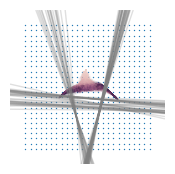

In [391]:
# HYPERPLANES
from sklearn.decomposition import PCA
#import seaborn as sns
from sympy import *
from sympy.plotting import plot
from sympy.plotting import plot_implicit

x = net.forward(u)
n_neurons = x.shape[2]
#Restrict to act

pca = PCA()
pca.fit(x.detach().numpy().reshape(-1,x.shape[2]))

U = pca.components_[:2,:].T
#U = latent_net.module_.q[:2,:].t().detach()
w = net.recurrent_layer.weight.data
#w = w-np.eye(50)
w_in = net.input_layer.weight.data

b = net.recurrent_layer.bias.data
#b = net.input_layer(u[1,60,:]).detach()+0.2

H = w @ U 
#H = H[sort,:]
proj_rates = pca.transform(x.detach().reshape(-1,x.shape[2]))
proj_rates = proj_rates.reshape(-1,75,x.shape[2])

fig = plt.figure(figsize=(2,2))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])

lim =6
xx,yy = np.linspace(-lim,lim), np.linspace(-lim,lim)
x,y = np.meshgrid(xx,yy)
for i in range(n_neurons):
#for i in np.argwhere(labels==0):

    magnitude = np.linalg.norm(H[i,:].numpy())

    #ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors=network_pal.as_hex()[labels[i]],linewidths=.75)
    ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors='gray',linewidths=1,alpha=.25)

pca = PCA(n_components = 2).fit(responses.T)
pcs = torch.tensor(pca.components_).float()
n_steps = 25
matrix = np.zeros((n_steps,n_steps))
xs = []
ys = []
lim = 2*np.max(proj_rates)
for i in range(n_steps):
    for j in range(n_steps):
        xs.append(np.linspace(-lim,lim,n_steps)[i])
        ys.append(np.linspace(-lim,lim,n_steps)[j])
        
        # Inverse transform (x,y) into state space
        #z = torch.tensor(pca.inverse_transform(np.array([[x,y]]))).float()
sns.scatterplot(x = xs,y =ys,ax=ax,s=1)
#for i in range(n_neurons):
# for i in np.argwhere(labels==0):
# 
#     magnitude = np.linalg.norm(H[i,:].numpy())
# 
#     #ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors=network_pal.as_hex()[labels[i]],linewidths=.75)
#     ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],color='gray',linewidths=.75,alpha=1)


# for i in np.argwhere(labels==1):
# 
#     magnitude = np.linalg.norm(H[i,:].numpy())
# 
#     #ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors=network_pal.as_hex()[labels[i]],linewidths=.75)
#     ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],color='gray',linewidths=.75)


# for i in range(25):
#     ax.plot(proj_rates[i,:,0],proj_rates[i,:,1],lw=1)
x = net.forward(u).detach().cpu().numpy()
pca = PCA()
pca.fit(x.reshape(-1, x.shape[2]))
x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
rows = []
for k in range(u.shape[0]):
    for t in range(u.shape[1]):
        rows.append({'trial': k,
                     'motion': conditions[k]['motion_coh'],
                     't': t,
                     'z_1': x_proj[k, t, 0],
                     'z_2': x_proj[k, t, 1], })
new_df = pd.DataFrame(rows)
new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()


sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=1,alpha=.1,edgecolor=None)
    
# sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=3, alpha=.5, hue='t',
#                 palette=palette)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
# ax.set_xlim(-4.2,4.2)
# ax.set_ylim(-4.2,4.2)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.savefig('Figures/Fig1c.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight'
            )

In [133]:
pca.explained_variance_[1]

1.6148721

In [50]:

df_list = []
for filename in os.listdir('Experiment_1/Results_1'):
    f = os.path.join('Experiment_1/Results_1', filename)
    if os.path.isfile(f):
        df_list.append(pd.read_pickle(f))
original_df = pd.concat(df_list,ignore_index=True) 
original_df = original_df[original_df.mse_z<.035]
original_df = original_df[original_df.lambda_std==0.1]
original_df = original_df[original_df.activity_std<.01]



fig = plt.figure(figsize=(7,.75))
gs = gridspec.GridSpec(1,7,wspace=.5)

for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100, input_size=2, dale=False)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0
    
    u, z, mask, conditions = generate_trials(
        n_trials=50)
    x = net(u).detach().cpu().numpy()
    
    rows = []
    for trial in range(u.shape[0]):
        rows.append({'trial': trial,
                     'motion': conditions[trial]['motion_coh'],
                     'response': x[trial, :, :]})
    model_df = pd.DataFrame(rows)
    model_df = model_df.groupby(['motion']).response.apply(lambda r: np.mean(np.stack(r), axis=0)).reset_index()
    
    responses = np.stack(model_df.response.values)
    responses = responses.reshape(-1, responses.shape[2]).T

    pca  = PCA().fit(responses)
    x_proj = pca.transform(responses)

    

    sns.scatterplot(x=x_proj[:, 0], y=x_proj[:, 1], color='gray', s=1, alpha=1, ax=ax)
    
    clustering = KMeans(n_clusters=3, n_init=20).fit(responses)
    centers_proj = pca.transform(clustering.cluster_centers_)
    # 
    sns.scatterplot(x=centers_proj[:, 0], y=centers_proj[:, 1], color='k', s=2, alpha=1, ax=ax, edgecolor=None)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    total_variance = np.sum((responses.T - np.mean(responses.T, axis=0, keepdims=True)) ** 2)
    score = clustering.inertia_/total_variance
    #ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(score,4)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=6,bottom=False)
    ax.yaxis.set_tick_params(labelsize=6,left=False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    # ax.set_xlim(-30,30)
    # ax.set_ylim(-30,30)
    ax.set_aspect('equal', adjustable='box')
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_c.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)



FileNotFoundError: [Errno 2] No such file or directory: 'Experiment_1/Results_1'

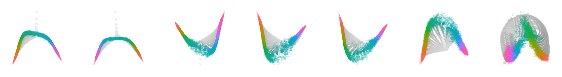

In [39]:
fig = plt.figure(figsize=(7,.75))
gs = gridspec.GridSpec(1,7,wspace=.5)

for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100, input_size=2, dale=False)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0
    x = net.forward(u).detach().numpy()
    x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
    #x = net(u)
    n_components = 2
    pca = PCA()
    pca.fit(x.reshape(-1, x.shape[2]))
    x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
    rows = []
    for k in range(u.shape[0]):
        for t in range(u.shape[1]):
            rows.append({'trial': k,
                         'motion': conditions[k]['motion_coh'],
                         'side': np.sign(conditions[k]['motion_coh']),
                         't': t,
                         'z_1': x_proj[k, t, 0],
                         'z_2': x_proj[k, t, 1], })
    new_df = pd.DataFrame(rows)
    new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()
#sns.blend_palette(["lightgray", "gray"]
    palette = sns.husl_palette(n_colors = 50,s=1)
    # sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=1,alpha=1,palette = sns.blend_palette(["lightgray", "gray"], as_cmap=True),edgecolor=None)
    sns.scatterplot(data=new_df_mean,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=.75,alpha=1,palette = sns.light_palette("gray",as_cmap=True),edgecolor=None)
    sns.scatterplot(data=new_df_mean[new_df_mean.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=2,alpha=1,palette = palette,edgecolor=None)
    sns.scatterplot(data=new_df[new_df.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=.25,alpha=.5,palette = palette,edgecolor=None)

    # sns.scatterplot(data=new_df_mean[new_df_mean.t==74], x='z_1', y='z_2', ax=ax, legend=False, s=2, alpha=1, hue='motion',
    #                 palette=palette)
    # 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel("PC 1", fontsize=7)
    ax.set_ylabel("PC 2", fontsize=7)
    
    variance = np.sum(pca.explained_variance_ratio_[2:])    
    #ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=7, bottom=True)
    ax.yaxis.set_tick_params(labelsize=7, left=True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_d.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

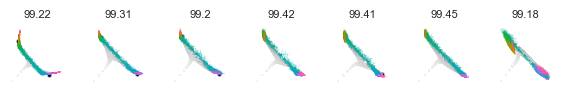

In [24]:
fig = plt.figure(figsize=(7,.75))
gs = gridspec.GridSpec(1,7,wspace=.5)

for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100, input_size=2, dale=False)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0
    x = net.forward(u).detach().numpy()
    #x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
    #x = net(u)
    n_components = 2
    pca = PCA()
    pca.fit(x.reshape(-1, x.shape[2]))
    x = net(u)
    output = net.output_layer(x).detach().numpy()
    rows = []
    for k in range(u.shape[0]):
        for t in range(u.shape[1]):
            rows.append({'trial': k,
                         'motion': conditions[k]['motion_coh'],
                         't': t,
                         'z_1': output[k, t, 0].item(),
                         'z_2': output[k, t, 1].item(),
                         'target_1': z[k, t, 0].item(),
                         'target_2': z[k, t, 1].item(), })
    new_df = pd.DataFrame(rows)
    new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()

    # sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=.5,alpha=.1,palette = palette,edgecolor=None)
    # 
    # sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=1, alpha=1, hue='t',
    #                 palette=palette)
    
    sns.scatterplot(data=new_df[new_df.t>57], x='target_1', y='target_2', ax=ax, legend=False, s=6, alpha=1,
                    color='k')
    palette = sns.husl_palette(n_colors = 50,s=1)
    # sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=1,alpha=1,palette = sns.blend_palette(["lightgray", "gray"], as_cmap=True),edgecolor=None)
    sns.scatterplot(data=new_df_mean,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=.5,alpha=1,palette = sns.light_palette("gray",as_cmap=True),edgecolor=None)
    sns.scatterplot(data=new_df_mean[new_df_mean.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=1,alpha=1,palette = palette,edgecolor=None)
    sns.scatterplot(data=new_df[new_df.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=.25,alpha=.5,palette = palette,edgecolor=None)
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel("PC 1", fontsize=7)
    ax.set_ylabel("PC 2", fontsize=7)
    
    variance = np.sum(pca.explained_variance_ratio_[2:])   
    mse_z = net.mse_z(x.to(device), z.to(device), mask.to(device)).detach().cpu().numpy()
    ax.set_title(str(np.round((1-mse_z)*100,2)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=7, bottom=True)
    ax.yaxis.set_tick_params(labelsize=7, left=True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_d.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

In [199]:
ids

['lPqmk5b3',
 'g3jQA0O1',
 'pHZc68vc',
 'u1Q6So8K',
 'tjX4aOeE',
 'VeKVrSSm',
 'U233SL9F']

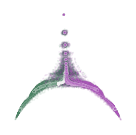

In [192]:
# STATE SPACE
#palette = sns.color_palette("coolwarm", n_colors=50,as_cmap=False)
palette = sns.husl_palette(75, s=1)

net.sigma_in = 0.1
net.sigma_rec = 0
x = net.forward(u).detach().numpy()
x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
#x = net(u)
n_components = 2
pca = PCA()
pca.fit(x.reshape(-1, x.shape[2]))
x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
rows = []
for k in range(u.shape[0]):
    for t in range(u.shape[1]):
        rows.append({'trial': k,
                     'motion': conditions[k]['motion_coh'],
                     'side': np.sign(conditions[k]['motion_coh']),
                     't': t,
                     'z_1': x_proj[k, t, 0],
                     'z_2': x_proj[k, t, 1], })
new_df = pd.DataFrame(rows)
new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()
fig = plt.figure(figsize=(1.5, 1.5))
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])

sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='side',ax=ax,legend=False,s=1,alpha=.1,palette = sns.diverging_palette(145, 300, s=60, as_cmap=True),edgecolor=None)
    
sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=3, alpha=.5, hue='side',
                palette=sns.diverging_palette(145, 300, s=60, as_cmap=True))
# sns.scatterplot(data=new_df_mean[new_df_mean.t==74],x='z_1',y='z_2',ax=ax,legend=False,s=6,alpha=1,hue='theta',palette=palette)

# Model predictions


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("PC 1", fontsize=7)
ax.set_ylabel("PC 2", fontsize=7)
#ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
ax.xaxis.set_tick_params(labelsize=7, bottom=True)
ax.yaxis.set_tick_params(labelsize=7, left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.gca().patch.set_alpha(0)
# ax.set_xlim(-1.25,1.25)
# ax.set_ylim(-1.25,1.25)
matplotlib.rcParams['savefig.transparent'] = True
fig.savefig('Figures/Exp_2_Fig_1.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight', transparent=True)

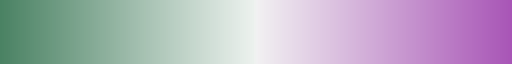

In [81]:
sns.diverging_palette(145, 300, s=60,n=25, as_cmap=True)

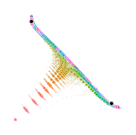

In [193]:





u, z, mask, conditions = generate_trials(
    n_trials=10)
net.sigma_in = 0.1
net.sigma_rec = 0

x = net(u)
output = net.output_layer(x).detach().numpy()
rows = []
for k in range(u.shape[0]):
    for t in range(u.shape[1]):
        rows.append({'trial': k,
                     'motion': conditions[k]['motion_coh'],
                     't': t,
                     'z_1': output[k, t, 0].item(),
                     'z_2': output[k, t, 1].item(),
                     'target_1': z[k, t, 0].item(),
                     'target_2': z[k, t, 1].item(), })
new_df = pd.DataFrame(rows)
new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()
fig = plt.figure(figsize=(1.5, 1.5))
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])

sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=1,alpha=.1,palette = palette,edgecolor=None)

sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=3, alpha=1, hue='t',
                palette=palette)

sns.scatterplot(data=new_df[new_df.t>57], x='target_1', y='target_2', ax=ax, legend=False, s=6, alpha=1,
                color='k')

# Plot targets


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("PC 1", fontsize=7)
ax.set_ylabel("PC 2", fontsize=7)
#ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
ax.xaxis.set_tick_params(labelsize=7, bottom=True)
ax.yaxis.set_tick_params(labelsize=7, left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]

fig.savefig('Figures/Exp_2_Fig_2.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight')
